In [0]:
# import basic libraries
import numpy as np 
import pandas as pd 
import warnings
import os
#warnings.filterwarnings("ignore")

# import plot libraries
import seaborn as sns
sns.set_palette('Set2')
import matplotlib.pyplot as plt
%matplotlib inline

# import ml libraries
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model, datasets
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()



In [0]:
# import data

from sklearn import linear_model, datasets

train = pd.read_csv("https://raw.githubusercontent.com/hajdeger/AOP_PUB/master/Prvi%20kolokvijum.csv")
test = pd.read_csv("https://raw.githubusercontent.com/hajdeger/AOP_PUB/master/Prvi%20kolokvijum.csv")

In [0]:
# check shape
print("Train rows and columns : ", train.shape)
print("Test rows and columns : ", test.shape)

Train rows and columns :  (406, 9)
Test rows and columns :  (406, 9)


In [0]:
# check column types
ctype = train.dtypes.reset_index()
ctype.columns = ["Count", "Column Type"]
ctype.groupby("Column Type").aggregate("count").reset_index()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
MPG             398 non-null float64
Cylinders       405 non-null object
Displacement    405 non-null object
HP              397 non-null object
Weight          405 non-null object
Acceleration    406 non-null object
Model year      406 non-null object
Origin          406 non-null int64
Car name        404 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 28.7+ KB


In [0]:
# display data header
train.head()

,MPG,Cylinders,Displacement,HP,Weight,Acceleration,Model year,Origin,Car name
0,18.0,8,307,130,3504,12,70,1,\tchevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,\tbuick skylark 320
2,18.0,8,318,150,3436,11,70,1,\tplymouth satellite
3,16.0,8,304,150,3433,12,70,1,\tamc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,\tford torino


In [0]:
# Let
numeric = ['MPG', 'Cylinders', 'Displacement', "HP",	"Weight", "Acceleration",	"Model year", "Origin"]
train[numeric] = train[numeric].apply(pd.to_numeric, errors='coerce')

In [0]:
train.dtypes

MPG             float64
Cylinders       float64
Displacement    float64
HP              float64
Weight          float64
Acceleration    float64
Model year      float64
Origin            int64
Car name         object
dtype: object

In [0]:
# numerical data distribution
train.describe()

,MPG,Cylinders,Displacement,HP,Weight,Acceleration,Model year,Origin
count,398.000000,403.000000,403.000000,393.000000,403.000000,403.000000,404.000000,406.000000
mean,23.514573,5.461538,193.827543,104.674300,2980.372208,15.499007,75.943069,1.568966
std,7.815984,1.709029,104.593733,38.628407,845.853986,2.798596,3.743544,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.500000,75.000000,2229.000000,13.650000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,95.000000,2830.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,284.500000,129.000000,3616.500000,17.150000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [0]:
# categorical data distribution
train.describe(include=["O"])


,Car name
count,404
unique,312
top,\tford pinto
freq,6


In [0]:
# check missing values
missing_df = train.isnull().sum(axis=0).reset_index()
missing_df.columns = ["column_name", "missing_count"]
missing_df = missing_df[missing_df["missing_count"]>0]
missing_df = missing_df.sort_values(by="missing_count")
missing_df

,column_name,missing_count
6,Model year,2
8,Car name,2
1,Cylinders,3
2,Displacement,3
4,Weight,3
5,Acceleration,3
0,MPG,8
3,HP,13


In [0]:
# impute/treat missing values
train["Car name"] = train["Car name"].fillna(train["Car name"].value_counts().index[0]) 
train["MPG"].fillna(train["MPG"].mean(), inplace=True) # for numerical (mean or median)
train["HP"].fillna(train["HP"].mean(), inplace=True) # for numerical (mean or median)
train["Acceleration"].fillna(train["Acceleration"].mean(), inplace=True) # for numerical (mean or median)
train["Weight"].fillna(train["Weight"].mean(), inplace=True) # for numerical (mean or median)
train["Displacement"].fillna(train["Displacement"].mean(), inplace=True) # for numerical (mean or median)
train["Cylinders"].fillna(train["Cylinders"].mean(), inplace=True) # for numerical (mean or median)
#train["Model year	"].fillna(train["Model year	"].mean(), inplace=True) # for numerical (mean or median)

In [0]:
# check missing values
missing_df = train.isnull().sum(axis=0).reset_index()
missing_df.columns = ["column_name", "missing_count"]
missing_df = missing_df[missing_df["missing_count"]>0]
missing_df = missing_df.sort_values(by="missing_count")
missing_df

,column_name,missing_count
6,Model year,2


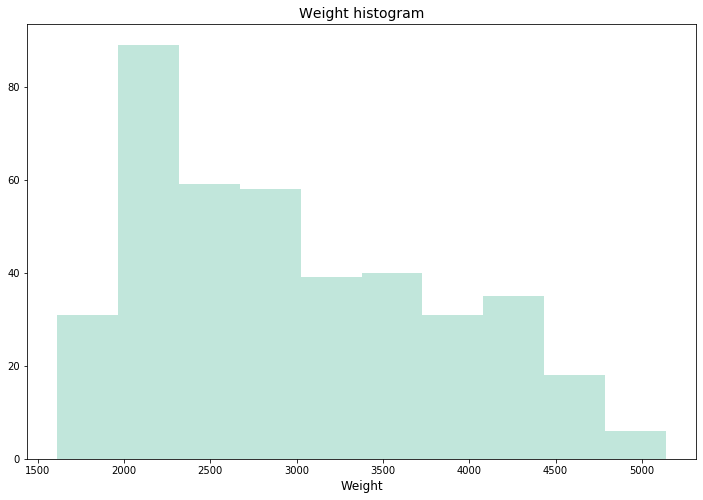

In [0]:
# histogram of numerical column
plt.figure(figsize=(12,8))
sns.distplot(train["Weight"].values, bins=10, kde=False)
plt.xlabel("Weight", fontsize=12)
plt.title("Weight histogram", fontsize=14)
plt.show()


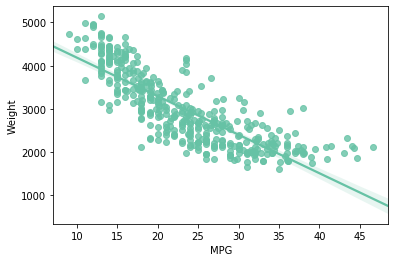

In [0]:
sns.regplot(x="MPG", y="Weight", data=train) # numerical vs numerical

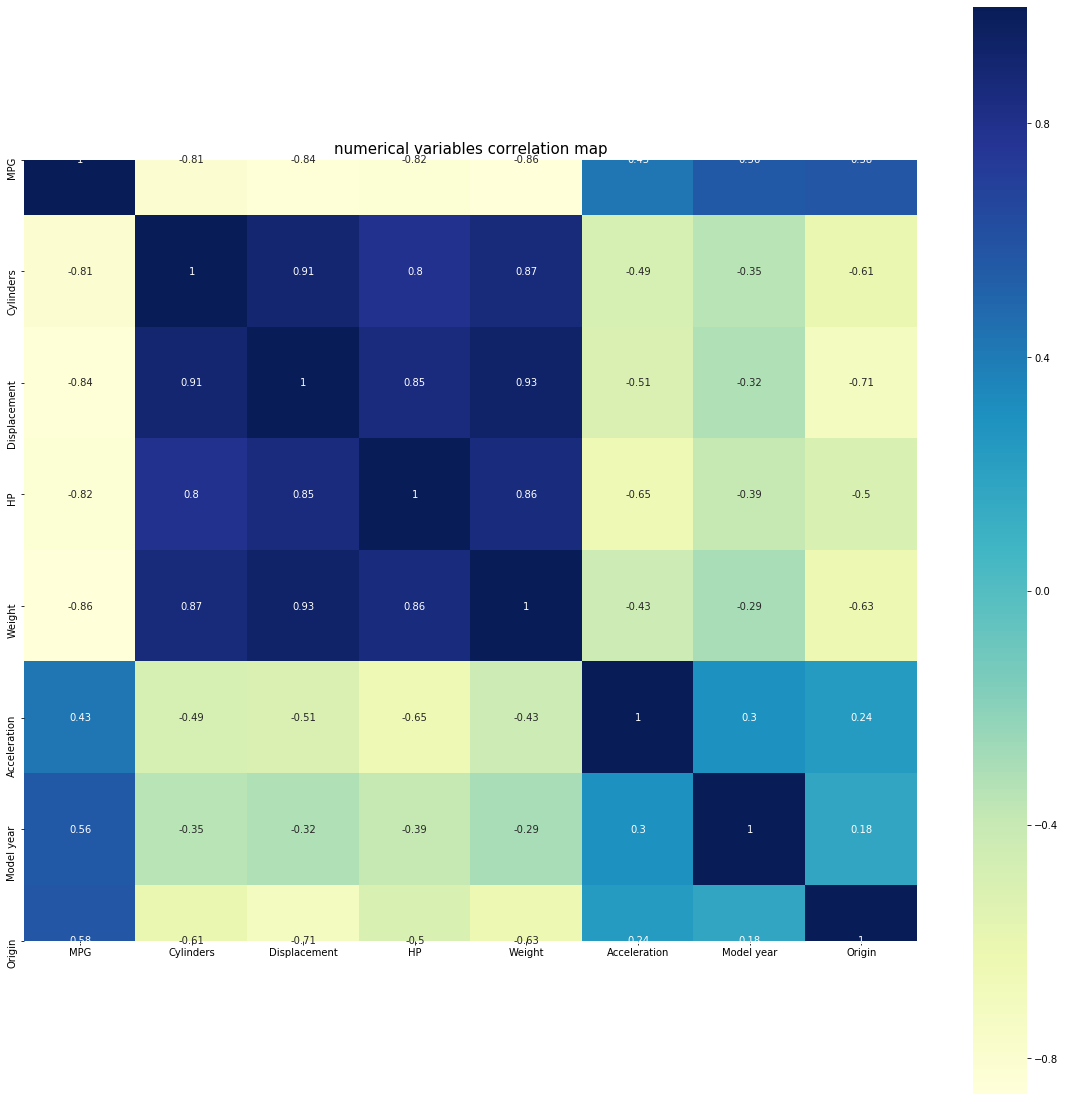

In [0]:
# multivariate analysis
temp = train[numeric]
corrmat = temp.corr(method="spearman")
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=1., square=True, cmap="YlGnBu", annot=True)
plt.title("numerical variables correlation map", fontsize=15)
plt.show()
